<a href="https://colab.research.google.com/github/nathanzilgo/Data-Science-Notebooks/blob/master/Regress%C3%A3o_M%C3%BAltipla_para_previs%C3%A3o_de_Desempenho_Acad%C3%AAmico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Múltipla para previsão de Desempenho Acadêmico

Importando Dataset e lendo csv com Pandas

In [1]:
import pandas as pd

In [3]:
!gdown https://drive.google.com/file/d/14vm9IOF-T5Y5DcmrH2VclX_fb2-abfyi/view

df = pd.read_csv('final_grades.csv')

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=14vm9IOF-T5Y5DcmrH2VclX_fb2-abfyi
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/14vm9IOF-T5Y5DcmrH2VclX_fb2-abfyi/view
To: /content/view
82.7kB [00:00, 39.1MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'final_grades.csv'

In [ ]:
df

In [ ]:
df.shape

(5000, 10)

# 1. Análise exploratória dos dados

In [ ]:
atributes = [col for col in df.columns if col != 'final_grade']
y_column = 'final_grade'
atributes

['study_hours_per_week',
 'books_read_year',
 'extracurricular_participation',
 'sleep_hours_per_night',
 'junk_food_consumption_per_week',
 'commute_time_to_school_min',
 'study_hours_with_assistance',
 'sport',
 'anxiety_level_test']

In [ ]:
X, y = df[atributes], df['final_grade']

In [ ]:
X

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test
0,18.065560,93,No,8.523188,0,1,7,Basketball,2
1,34.269198,19,No,9.644920,7,5,29,Swimming,1
2,37.763791,76,No,4.377829,11,13,13,Basketball,3
3,13.437846,2,No,4.644968,10,2,47,Baseball,2
4,22.427779,37,No,4.486873,1,10,45,Basketball,1
...,...,...,...,...,...,...,...,...,...
4995,20.507358,22,No,11.416860,12,8,43,Volleyball,3
4996,5.873927,81,No,9.685338,18,6,54,Basketball,2
4997,22.041254,23,Yes,11.494765,4,0,56,Soccer,1
4998,5.786196,67,Yes,9.279768,1,0,43,Soccer,0


In [ ]:
y.mean()

61.646234

In [ ]:
X['sport'].unique()

array(['Basketball', 'Swimming', 'Baseball', 'Lacrosse', 'Soccer',
       'Volleyball', 'Football', 'Athletics', 'Wrestling', 'Cheerleading'],
      dtype=object)

In [ ]:
sports = {'Basketball': 1, 'Swimming': 2, 'Baseball': 3, 'Lacrosse': 4, 'Soccer': 5,
       'Volleyball': 6, 'Football': 7, 'Athletics': 8, 'Wrestling': 9, 'Cheerleading': 10}
participation = {'Yes': 1, 'No': 0}

X['extracurricular_participation'] = X['extracurricular_participation'].map(participation)
X['sport'] = X['sport'].map(sports)


<ipython-input-10-f36a9fc6757b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['extracurricular_participation'] = X['extracurricular_participation'].map(participation)
<ipython-input-10-f36a9fc6757b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sport'] = X['sport'].map(sports)


## Correlações entre as variáveis preditoras

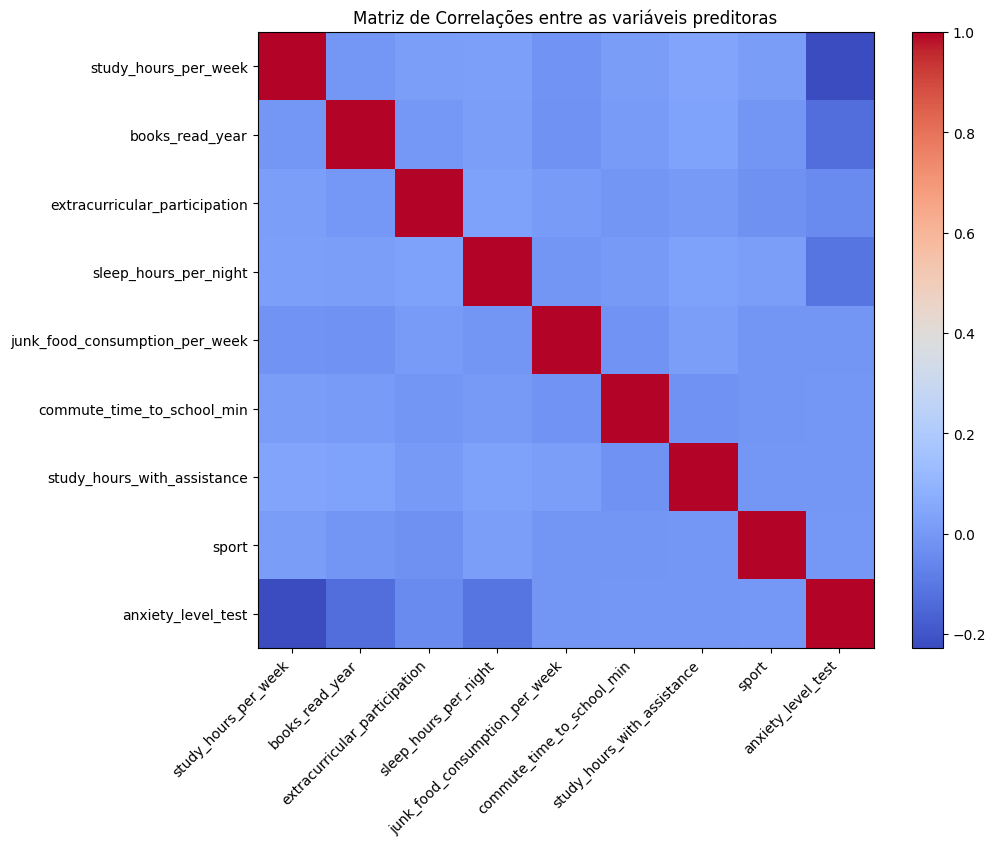

In [ ]:
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(10, 8))

# Create a colormap for the correlation matrix
cmap = 'coolwarm'

# Create the heatmap
plt.imshow(corr, cmap=cmap)

# Add colorbar
plt.colorbar()

# Add labels for each cell (optional)
# You can uncomment this block to add labels if you want
# for i in range(len(corr.columns)):
#     for j in range(len(corr.columns)):
#         plt.text(i, j, corr.iloc[i, j], ha='center', va='center', fontsize=8)

# Add labels for axes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

# Add title
plt.title('Matriz de Correlações entre as variáveis preditoras')

# Show the plot
plt.show()

## Correlação entre cada variável preditora e a variável-alvo.

In [ ]:
correlations = df.corrwith(df["final_grade"])
correlations

<ipython-input-12-066e366e3bea>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df["final_grade"])


study_hours_per_week              0.773320
books_read_year                   0.381580
sleep_hours_per_night             0.226908
junk_food_consumption_per_week   -0.006421
commute_time_to_school_min        0.028780
study_hours_with_assistance       0.072009
anxiety_level_test               -0.305749
final_grade                       1.000000
dtype: float64

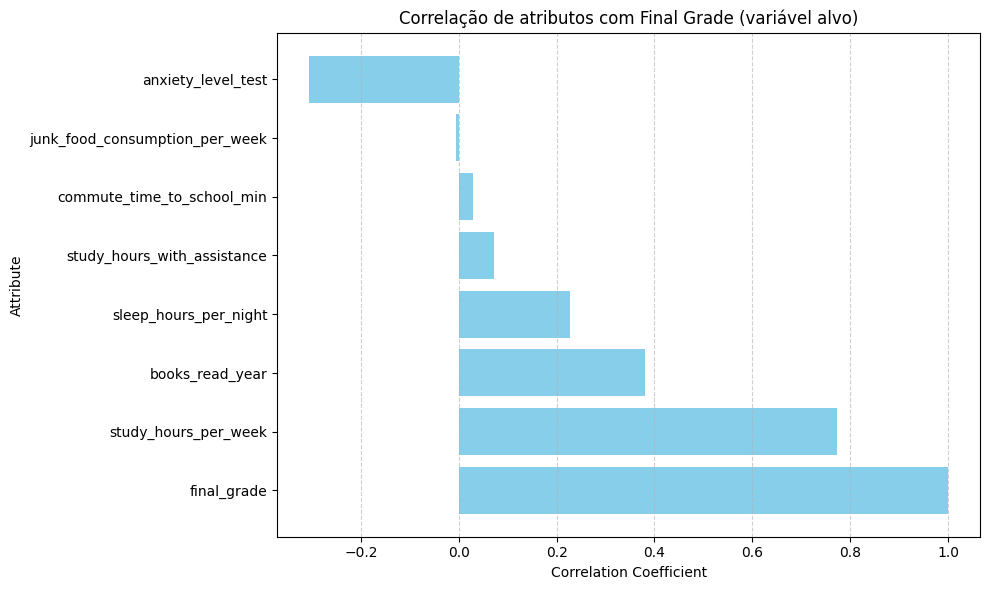

In [ ]:
corr_df = pd.DataFrame(correlations, columns=['Correlation'])
corr_df.sort_values(by='Correlation', inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(corr_df.index, corr_df['Correlation'], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attribute')
plt.title('Correlação de atributos com Final Grade (variável alvo)')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid for readability


plt.gca().invert_yaxis()  # Invert y-axis to display strongest correlations at the top
plt.tight_layout()  # Adjust spacing for better readability

plt.show()

# 2. Treino de modelos de Regressão Linear utilizando sklearn e avaliando usando 5-fold cross validation

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## Utilizando a variável melhor correlacionada com a variável-alvo:

In [ ]:
correlations

study_hours_per_week              0.773320
books_read_year                   0.381580
sleep_hours_per_night             0.226908
junk_food_consumption_per_week   -0.006421
commute_time_to_school_min        0.028780
study_hours_with_assistance       0.072009
anxiety_level_test               -0.305749
final_grade                       1.000000
dtype: float64

In [ ]:
max_correlation_attribute = max(correlations.drop('final_grade').keys(), key=correlations.get)
max_correlation_attribute

'study_hours_per_week'

In [ ]:
features = df[[max_correlation_attribute]]
features

,study_hours_per_week
0,18.065560
1,34.269198
2,37.763791
3,13.437846
4,22.427779
...,...
4995,20.507358
4996,5.873927
4997,22.041254
4998,5.786196


In [ ]:
model = LinearRegression()
model.fit(features, df['final_grade'])
cv_scores = cross_val_score(model, features, df['final_grade'], cv=5)
predicted_grades = model.predict(features)
var_best = {
    "R2": np.mean(cv_scores),
    "RMSE": np.sqrt(mean_squared_error(df['final_grade'], predicted_grades, squared=False))
}

print(f"R² mean: {np.mean(cv_scores)}")

for score in cv_scores:
    print(f"R²: {score}")

R² médio: 0.5968120743265697
R²: 0.6098952623856264
R²: 0.588439774724504
R²: 0.5882496510254626
R²: 0.587237571464045
R²: 0.6102381120332103


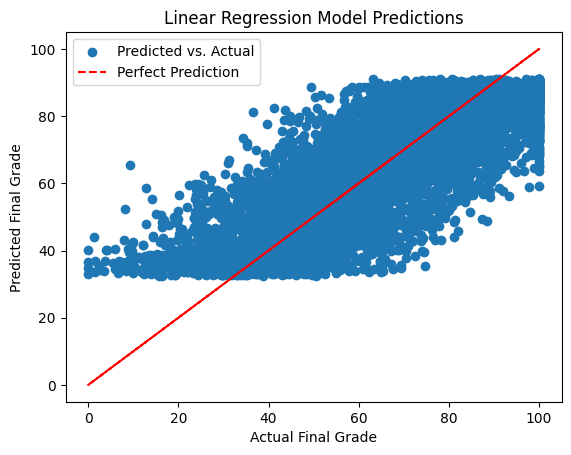

In [ ]:
plt.scatter(df['final_grade'], predicted_grades, label='Predicted vs. Actual')

plt.plot(df['final_grade'], df['final_grade'], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Linear Regression Model Predictions')

plt.legend()

plt.show()

## Utilizando as três variáveis melhores correlacionadas com a variável-alvo

In [ ]:
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))
top_3_attributes = list(sorted_correlations.keys())[:3]
top_3_attributes
features = df[top_3_attributes]
features

,final_grade,study_hours_per_week,books_read_year
0,52.62,18.065560,93
1,59.90,34.269198,19
2,81.21,37.763791,76
3,30.57,13.437846,2
4,68.09,22.427779,37
...,...,...,...
4995,48.68,20.507358,22
4996,50.36,5.873927,81
4997,64.67,22.041254,23
4998,69.71,5.786196,67


In [ ]:
model.fit(features, df['final_grade'])
cv_scores = cross_val_score(model, features, df['final_grade'], cv=5)

predicted_grades = model.predict(features)

var_three_best = {
    "R2": np.mean(cv_scores),
    "RMSE": np.sqrt(mean_squared_error(df['final_grade'], predicted_grades, squared=False))
}

print(f"R² mean: {np.mean(cv_scores)}")

# Imprimindo os R² de cada fold
for score in cv_scores:
    print(f"R²: {score}")

R² médio: 1.0
R²: 1.0
R²: 1.0
R²: 1.0
R²: 1.0
R²: 1.0


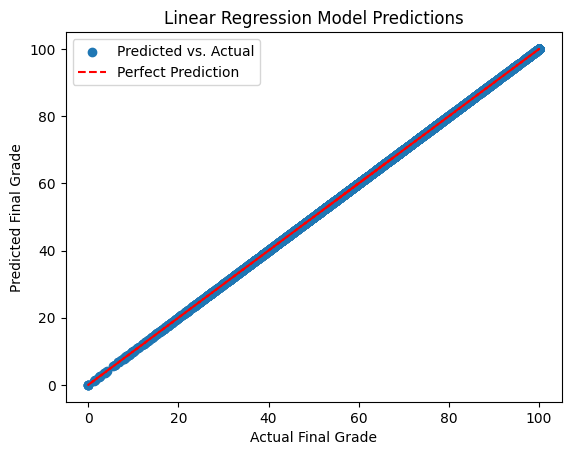

In [ ]:
# Scatter plot of actual vs. predicted grades
plt.scatter(df['final_grade'], predicted_grades, label='Predicted vs. Actual')

# Add a line for the perfect prediction (y = x)
plt.plot(df['final_grade'], df['final_grade'], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Linear Regression Model Predictions')

plt.legend()

plt.show()

## Utilizando todas as variáveis.

In [ ]:
model.fit(X, y)
predicted_grades = model.predict(X)
cv_scores = cross_val_score(model, X, y, cv=5)
var_all = {
    "R2": np.mean(cv_scores),
    "RMSE": np.sqrt(mean_squared_error(df['final_grade'], predicted_grades, squared=False))
}
print(f"R² mean: {np.mean(cv_scores)}")

# Imprimindo os R² de cada fold
for score in cv_scores:
    print(f"R²: {score}")

R² médio: 0.8024449605001023
R²: 0.813002612995665
R²: 0.7933597594566363
R²: 0.7929366226914095
R²: 0.7972206126393685
R²: 0.8157051947174315


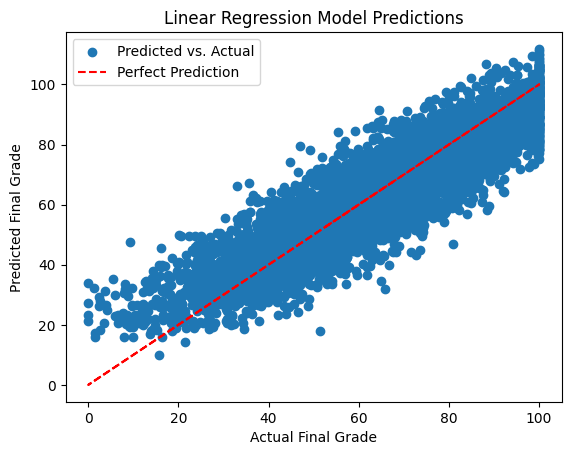

In [ ]:
plt.scatter(df['final_grade'], predicted_grades, label='Predicted vs. Actual')

plt.plot(df['final_grade'], df['final_grade'], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Linear Regression Model Predictions')

plt.legend()

plt.show()

## Compare todos os modelos, em termos de RMSE e R2, entre si e com um modelo que simplesmente prevê a média da variável alvo. Qual o melhor modelo? Discuta os resultados

In [ ]:
print(f"All variables: {var_all}")
print(f"Three best variables: {var_three_best}")
print(f"Best variable: {var_best}")

All variables: {'R2': 0.8024449605001023, 'RMSE': 3.0994535423047207}
Three best variables: {'R2': 1.0, 'RMSE': 8.185353819127446e-08}
Best variable: {'R2': 0.5968120743265697, 'RMSE': 3.709197258342587}


## Plote os resíduos vs previsões e discuta a viabilidade do modelo de regressão

---



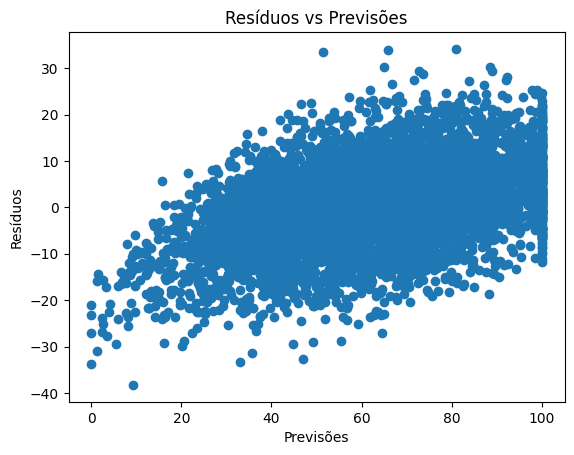

In [ ]:
residuals = y - predicted_grades

plt.scatter(y, residuals)
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões")
plt.show()

# 3. Use a Regressão Lasso para selecionar o melhor (sub)conjunto de atributos. Tune o lambda usando validação cruzada. Discuta esses resultados à luz das duas questões anteriores.

In [ ]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-1, 3, 100)

scores = []
for alpha in alphas:
  lasso = Lasso(alpha)
  cv_scores = cross_val_score(lasso, X, y, cv= 5)
  scores.append(np.mean(cv_scores))

best_alpha = alphas[np.argmax(scores)]

In [ ]:
best_lasso = Lasso(best_alpha)
best_lasso.fit(X,y)

Lasso(alpha=0.1)

In [ ]:
selected_attributes = [name for name, coef in zip(X.columns, best_lasso.coef_) if coef != 0]
selected_attributes

['study_hours_per_week',
 'books_read_year',
 'extracurricular_participation',
 'sleep_hours_per_night',
 'junk_food_consumption_per_week',
 'commute_time_to_school_min',
 'study_hours_with_assistance',
 'anxiety_level_test']

# 4. Escolha um modelo diferente da regressão linear (e.g., KNN, SVR, Decision Trees, Random Forests, etc.). Estude o funcionamento do modelo e treine esse modelo usando todas as variáveis. Avalie o modelo como no passo 02 acima e compare com os resultados da regressão linear (também usando todas as variáveis). Discuta os resultados à luz do que estudou sobre o funcionamento desse modelo

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared (R^2): 1.0


Text(0.5, 1.0, 'Decision Tree Reg Feature Importance')

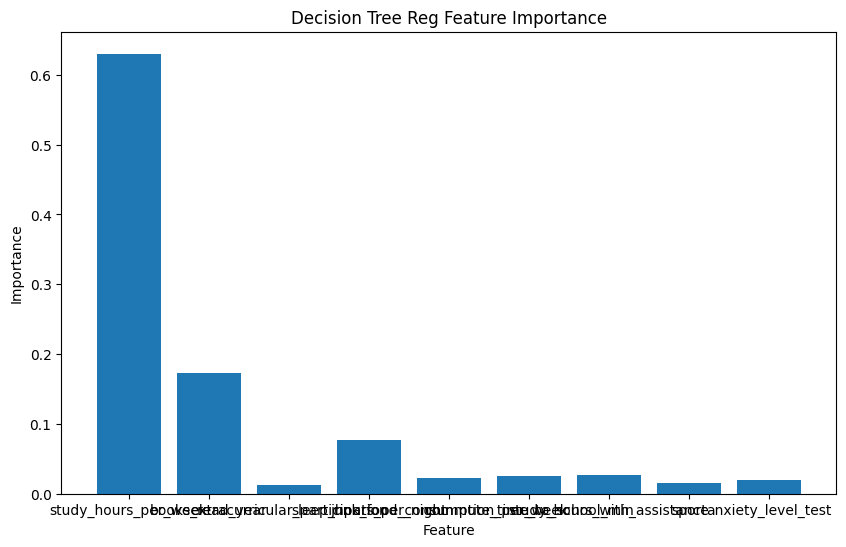

In [ ]:
knn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()

dtr.fit(X, y)
y_pred = dtr.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

feature_names = atributes
plt.figure(figsize=(10,6))
plt.bar(feature_names, dtr.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Reg Feature Importance")

Mean Squared Error (MSE): 14.122499001485997
Root Mean Squared Error (RMSE): 3.757991351970624
R-squared (R^2): 0.9700089536356681


Text(0.5, 1.0, 'Random Forest Reg Feature Importance')

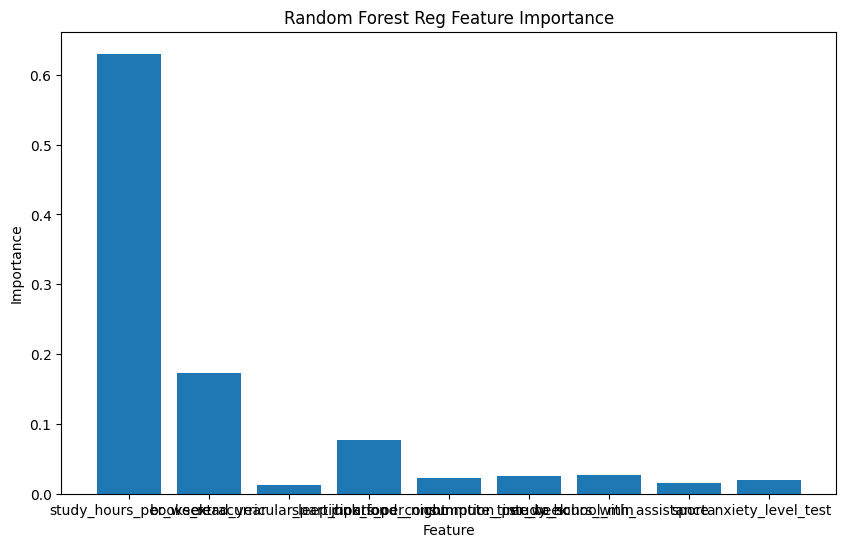

In [ ]:
rfr.fit(X, y)
y_pred = rfr.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

feature_names = atributes
plt.figure(figsize=(10,6))
plt.bar(feature_names, dtr.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Reg Feature Importance")

Mean Squared Error (MSE): 108.6003900394081
Root Mean Squared Error (RMSE): 10.42115108994242
R-squared (R^2): 0.769372309212859


Text(0.5, 1.0, 'SV Feature Importance')

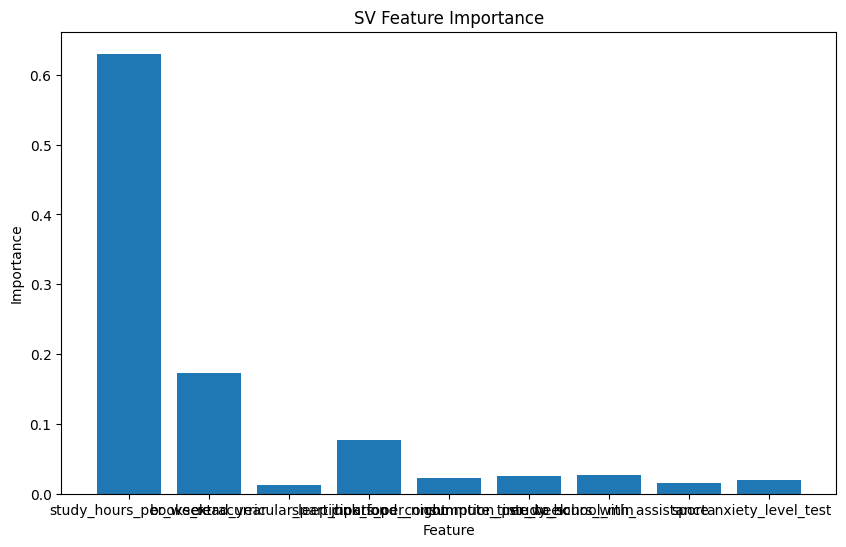

In [ ]:
svr.fit(X, y)
y_pred = svr.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

feature_names = atributes
plt.figure(figsize=(10,6))
plt.bar(feature_names, dtr.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("SV Feature Importance")